In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import albumentations as A
import cv2

In [2]:
cat_df = pd.read_csv('labelled_data.csv')
cat_df.head()

,img_name,features,left_eye_x,left_eye_y,right_eye_x,right_eye_y,mouth_x,mouth_y,left_ear_1_x,left_ear_1_y,left_ear_2_x,left_ear_2_y,left_ear_3_x,left_ear_3_y,right_ear_1_x,right_ear_1_y,right_ear_2_x,right_ear_2_y,right_ear_3_x,right_ear_3_y
0,00000001_000.jpg,9,175,160,239,162,199,199,149,121,137,78,166,93,281,101,312,96,296,133
1,00000001_005.jpg,9,96,96,153,127,103,146,48,20,78,-37,127,5,210,52,260,63,229,121
2,00000001_008.jpg,9,318,222,340,224,327,238,301,199,304,182,321,196,341,197,359,183,361,203
3,00000001_011.jpg,9,167,173,242,185,191,247,112,105,118,0,171,74,270,90,353,35,332,147
4,00000001_012.jpg,9,115,122,179,121,133,169,95,70,93,17,131,46,233,39,281,9,224,69


In [3]:
n = 2
img_name = cat_df.iloc[n, 0]
points = cat_df.iloc[n, 2:]
points = np.asarray(points)
points = points.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(points.shape))
print('First 4 Landmarks: {}'.format(points))

Image name: 00000001_008.jpg
Landmarks shape: (9, 2)
First 4 Landmarks: [[318. 222.]
 [340. 224.]
 [327. 238.]
 [301. 199.]
 [304. 182.]
 [321. 196.]
 [341. 197.]
 [359. 183.]
 [361. 203.]]


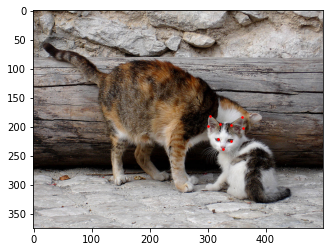

In [4]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(points[:, 0], points[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('cats/', img_name)),
               points)
plt.show()

In [5]:
#Define an Augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=224, height=224),
    A.RandomBrightnessContrast(p=0.2),
], keypoint_params=A.KeypointParams(format='xy'))

In [6]:
n = 2

img_name = cat_df.iloc[n, 0]
points = cat_df.iloc[n, 2:]
points = np.asarray(points)
points = points.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(points.shape))
keypoints = []
for point in points:
    keypoints.append((point[0], point[1]))

print(keypoints)

image = cv2.imread('cats/' + img_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = transform(image=image, keypoints=keypoints)
transformed_image = transform['image']
transformed_keypoints = transform['keypoints']


Image name: 00000001_008.jpg
Landmarks shape: (9, 2)
[(318.0, 222.0), (340.0, 224.0), (327.0, 238.0), (301.0, 199.0), (304.0, 182.0), (321.0, 196.0), (341.0, 197.0), (359.0, 183.0), (361.0, 203.0)]


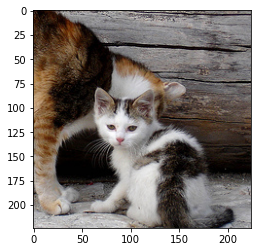

In [7]:
plt.figure()
plt.imshow(transformed_image)
plt.show()

In [8]:
transformed_points = []
for point in transformed_keypoints:
    transformed_points.append([point[0], point[1]])

transformed_points = np.asarray(transformed_points)
transformed_points

array([[ 80., 119.],
       [102., 121.],
       [ 89., 135.],
       [ 63.,  96.],
       [ 66.,  79.],
       [ 83.,  93.],
       [103.,  94.],
       [121.,  80.],
       [123., 100.]])

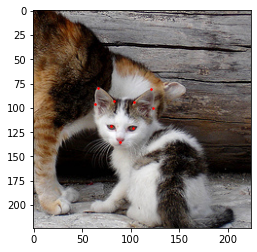

In [9]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(transformed_points[:, 0], transformed_points[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(transformed_image,
               transformed_points)
plt.show()

In [10]:
def transformImage(i):
    transform = A.Compose([
        A.RandomCrop(width=224, height=224),
        A.RandomBrightnessContrast(p=0.2),
        ], keypoint_params=A.KeypointParams(format='xy'))

    img_name = cat_df.iloc[i, 0]
    points = cat_df.iloc[i, 2:]
    points = np.asarray(points)
    points = points.astype('float').reshape(-1, 2)

    new_points = []
    for point in points:
        new_points.append((point[0], point[1]))

    image = cv2.imread('cats/' + img_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transform(image=image, keypoints=new_points)
    transformed_image = transform['image']
    transformed_keypoints = transform['keypoints']

    transformed_points = []
    for point in transformed_keypoints:
        transformed_points.append([point[0], point[1]])

    transformed_keypoints = np.asarray(transformed_points)
    return transformed_image, transformed_keypoints

In [11]:
columnNames = ['img_name', 'left_eye_x', 'left_eye_y', 
               'right_eye_x', 'right_eye_y',
               'mouth_x', 'mouth_y', 'left_ear_1_x', 'left_ear_1_y',
               'left_ear_2_x', 'left_ear_2_y', 'left_ear_3_x', 'left_ear_3_y',
               'right_ear_1_x', 'right_ear_1_y', 'right_ear_2_x', 'right_ear_2_y',
               'right_ear_3_x', 'right_ear_3_y']
df = pd.DataFrame([], columns=columnNames)

for i in range(len(cat_df)):
    #ensure points are positive
    img_name = cat_df.iloc[i, 0]
    points = cat_df.iloc[i, 2:]
    arr=[]
    for num in points:
        arr.append(num)
    if any(n < 0 for n in arr):
        continue
    #ensure points can fit in a 224x224 image
    arr_x = []
    arr_y = []
    for i in range(len(points)):
        if i % 2 == 0:
            arr_x.append(points[i])
        else:
            arr_y.append(points[i])
    if (max(arr_x) - min(arr_x) > 196):
        continue
    if (max(arr_y) - min(arr_y) > 196):
        continue

    #Generate image and 9 keypoints to ensure cat face is in frame
    while True:
        image, points = transformImage(i)
        if points.size == 18:
            break
    
    #save image
    cv2.imwrite('cats_augmented/' + img_name, image)
    
    #save keypoints
    save_points = []
    save_points.append(img_name)
    for num in points:
        save_points.append(num[0])
        save_points.append(num[1])
    save_points = pd.Series(save_points, index=columnNames)
    df = df.append(save_points, ignore_index=True)

df.head()

,img_name,left_eye_x,left_eye_y,right_eye_x,right_eye_y,mouth_x,mouth_y,left_ear_1_x,left_ear_1_y,left_ear_2_x,left_ear_2_y,left_ear_3_x,left_ear_3_y,right_ear_1_x,right_ear_1_y,right_ear_2_x,right_ear_2_y,right_ear_3_x,right_ear_3_y
0,00000001_000.jpg,82.0,88.0,119.0,87.0,102.0,120.0,32.0,63.0,41.0,20.0,72.0,40.0,115.0,39.0,152.0,21.0,138.0,59.0
1,00000001_008.jpg,126.0,88.0,163.0,87.0,146.0,120.0,76.0,63.0,85.0,20.0,116.0,40.0,159.0,39.0,196.0,21.0,182.0,59.0
2,00000001_012.jpg,55.0,150.0,92.0,149.0,75.0,182.0,5.0,125.0,14.0,82.0,45.0,102.0,88.0,101.0,125.0,83.0,111.0,121.0
3,00000001_016.jpg,73.0,91.0,110.0,90.0,93.0,123.0,23.0,66.0,32.0,23.0,63.0,43.0,106.0,42.0,143.0,24.0,129.0,62.0
4,00000001_024.jpg,89.0,122.0,126.0,121.0,109.0,154.0,39.0,97.0,48.0,54.0,79.0,74.0,122.0,73.0,159.0,55.0,145.0,93.0


In [12]:
#Save dataframe as CSV
df.to_csv('augmented_labels.csv',index=False)